# Basic Stock Time Series Analysis


## Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
from icecream import ic 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import datetime
import numpy as np




## Some Settings

In [2]:
#for currency conversion
ccy_conv = 0

#to set warning on/off
warning_off = 1

#statics for this analysis
start = "2018-01-01"
end = '2021-12-31'
stockcode1 = '0005.HK'
stockcode2 = '3115.HK'

if warning_off == 1:
    import warnings
    warnings.filterwarnings("ignore")


## Data Download 

In [3]:

#using this method you need to use only the adjusted close for corp action, other fields are not adjusted
#s1 = yf.download(stockcode1,start,end)
#s2 = yf.download(stockcode2,start,end)

s1ticker = yf.Ticker(stockcode1)
s2ticker = yf.Ticker(stockcode2)

#using this method to download stock prices would have all corp action adjusted for all open, high, low and close
s1 = s1ticker.history(start=start,  end=end)
s2 = s2ticker.history(start=start,  end=end)

## Basic Plot of two stocks

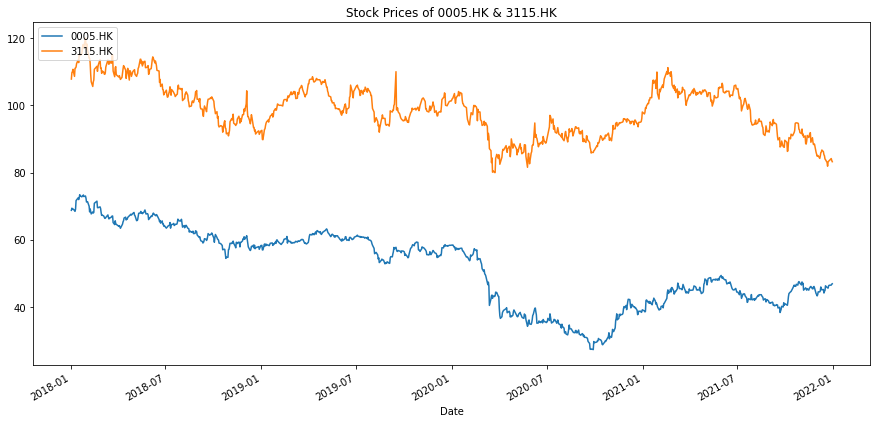

In [4]:
s1['Open'].plot(label = stockcode1, figsize = (15,7))
s2['Open'].plot(label = stockcode2)

plt.legend(loc="upper left")
plt.title('Stock Prices of %s & %s' % (stockcode1, stockcode2));

## Get some basic info

In [5]:
#s1ticker.info

In [6]:
#s2ticker.info

In [7]:

if ccy_conv == 1:
    print("%s currency is %s" % (stockcode1, s1ticker.info['currency']))
    print("%s currency is %s" % (stockcode2, s2ticker.info['currency']))

In [8]:
s1.info()
s1.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 986 entries, 2018-01-02 to 2021-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          986 non-null    float64
 1   High          986 non-null    float64
 2   Low           986 non-null    float64
 3   Close         986 non-null    float64
 4   Volume        986 non-null    int64  
 5   Dividends     986 non-null    float64
 6   Stock Splits  986 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 61.6 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,986.000000,986.000000,986.000000,986.000000,9.860000e+02,986.000000,986.0
mean,51.588561,51.975434,51.232807,51.609868,2.666110e+07,0.010055,0.0
std,11.322995,11.292601,11.372697,11.324766,2.058406e+07,0.104267,0.0
min,27.310741,27.599743,26.491902,27.166243,0.000000e+00,0.000000,0.0
25%,42.163717,42.509320,41.624999,42.194374,1.416816e+07,0.000000,0.0
50%,54.903700,55.452617,54.775067,55.134956,2.035758e+07,0.000000,0.0
75%,60.243203,60.663177,60.096539,60.389971,3.252042e+07,0.000000,0.0
max,73.400662,73.400662,72.845874,73.272629,2.123651e+08,1.647932,0.0


In [9]:
s2.info()
s2.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 986 entries, 2018-01-02 to 2021-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          986 non-null    float64
 1   High          986 non-null    float64
 2   Low           986 non-null    float64
 3   Close         986 non-null    float64
 4   Volume        986 non-null    int64  
 5   Dividends     986 non-null    int64  
 6   Stock Splits  986 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 61.6 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.0,986.0
mean,98.710781,99.083976,98.115882,98.541156,25243.091278,0.0,0.0
std,7.686582,7.695871,7.666945,7.678741,55479.157066,0.0,0.0
min,80.000000,80.000000,76.250000,78.099998,0.000000,0.0,0.0
25%,93.242498,93.639999,92.542501,92.985003,1825.000000,0.0,0.0
50%,98.825001,99.000000,98.400002,98.750000,8200.000000,0.0,0.0
75%,104.000000,104.250000,103.300003,103.800003,23550.000000,0.0,0.0
max,120.000000,120.000000,118.300003,118.800003,718970.000000,0.0,0.0


In [10]:
# s1[np.abs(s1.Open-s1.Open.mean()) <= (5*s1.Open.std())]
# keep only the ones that are within +5 to -5 standard deviations in the column 'Open'.

In [11]:
# s2[np.abs(s2.Open-s2.Open.mean()) <= (5*s2.Open.std())]
# keep only the ones that are within +5 to -5 standard deviations in the column 'Open'.

### Download the FX rate for each stock

In [12]:
if ccy_conv ==1: 
    if s1ticker.info['currency'] != 'USD':
        c1ticker = yf.Ticker(s1ticker.info['currency'] + '=X')
        c1 = c1ticker.history(start=start,  end=end)


if ccy_conv ==1:
    if s2ticker.info['currency'] != 'USD':
        c2ticker = yf.Ticker(s2ticker.info['currency'] + '=X')
        c2 = c2ticker.history(start=start,  end=end)

### Align stocks vs FX rates

In [13]:
if ccy_conv ==1:
    if s1ticker.info['currency'] != 'USD':
        s1, c1 = s1.align(c1, join='inner', axis=0)
        s1['Open'] = s1['Open'] / c1['Close']
        s1['High'] = s1['High'] / c1['Close']
        s1['Low'] = s1['Low'] / c1['Close']
        s1['Close'] = s1['Close'] / c1['Close']

if ccy_conv ==1:
    if s2ticker.info['currency'] != 'USD':    
        s2, c2 = s2.align(c2, join='inner', axis=0)
        s2['Open'] = s2['Open'] / c2['Close']
        s2['High'] = s2['High'] / c2['Close']
        s2['Low'] = s2['Low'] / c2['Close']
        s2['Close'] = s2['Close'] / c2['Close']

### Check Dividend

In [14]:
#s1.query('Dividends !=0')
#s2.query('Dividends !=0')

## Align two stocks according to the time index

In [15]:
s1, s2 = s1.align(s2, join='inner', axis=0)

## Use normalized open to perform analysis

In [16]:
first = s1.head(1)['Open'].values
s1['Normalized_Open'] = s1['Open'] / first

In [17]:
first = s2.head(1)['Open'].values
s2['Normalized_Open'] = s2['Open'] / first

## Normalized Open Plot

Text(0.5, 1.0, 'Stock Prices of 0005.HK & 3115.HK with adjusted opening')

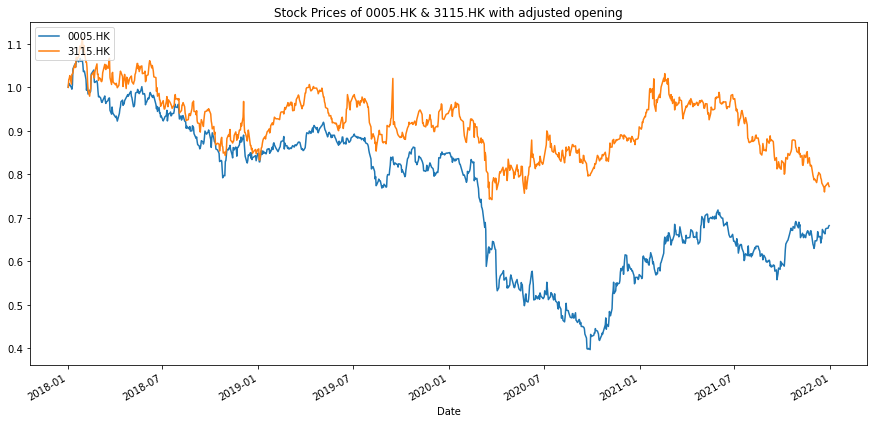

In [18]:
s1['Normalized_Open'].plot(label = stockcode1, figsize = (15,7))
s2['Normalized_Open'].plot(label = stockcode2)

plt.legend(loc="upper left")
plt.title('Stock Prices of %s & %s with adjusted opening' % (stockcode1, stockcode2))

## Volume and Market Cap Analysis

In [19]:
# calculate market cap

s1['MarktCap'] = s1['Open'] * s1['Volume']
s2['MarktCap'] = s2['Open'] * s2['Volume']

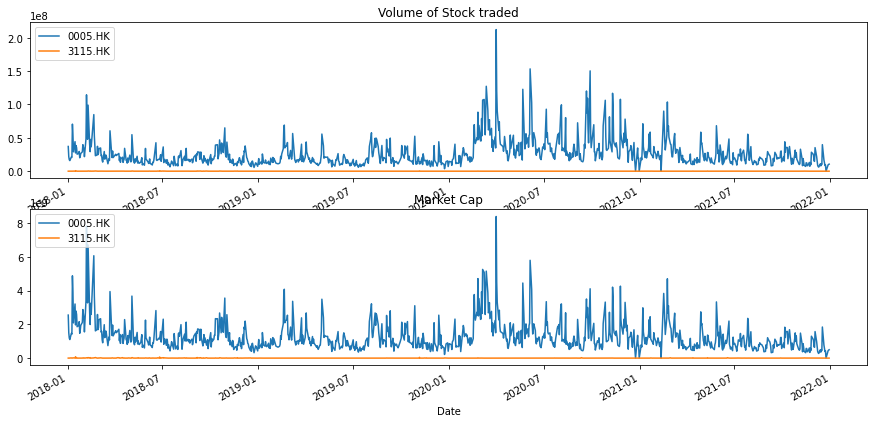

In [20]:

plt.subplot(2, 1, 1)

s1['Volume'].plot(label = stockcode1, figsize = (15,7))
s2['Volume'].plot(label = stockcode2)
plt.title('Volume of Stock traded')
plt.legend(loc="upper left")

#Market Capitalisation
plt.subplot(2, 1, 2)
s1['MarktCap'].plot(label = stockcode1)
s2['MarktCap'].plot(label = stockcode2)
plt.title('Market Cap')
plt.legend(loc="upper left")


## Moving Average Plot

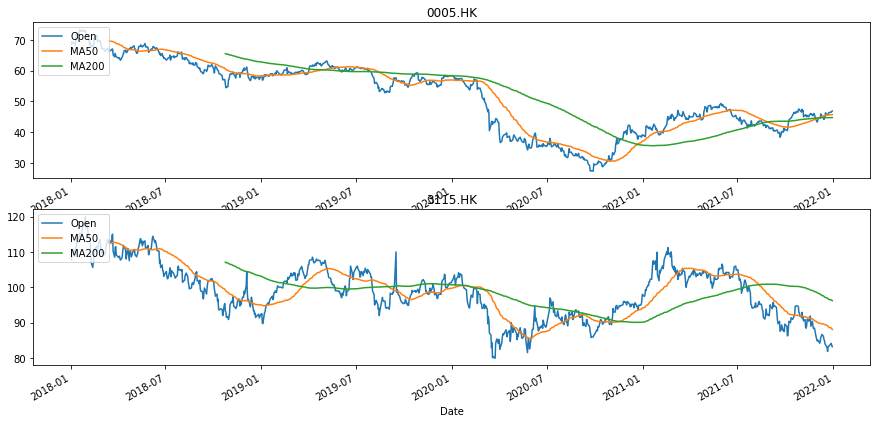

In [21]:
plt.subplot(2, 1, 1)

s1['MA50'] = s1['Open'].rolling(50).mean()
s1['MA200'] = s1['Open'].rolling(200).mean()
s1['Open'].plot(figsize = (15,7))
s1['MA50'].plot()
s1['MA200'].plot()
plt.title(stockcode1)
plt.legend(loc="upper left")

plt.subplot(2, 1, 2)

s2['MA50'] = s2['Open'].rolling(50).mean()
s2['MA200'] = s2['Open'].rolling(200).mean()
s2['Open'].plot(figsize = (15,7))
s2['MA50'].plot()
s2['MA200'].plot()
plt.title(stockcode2)
plt.legend(loc="upper left")

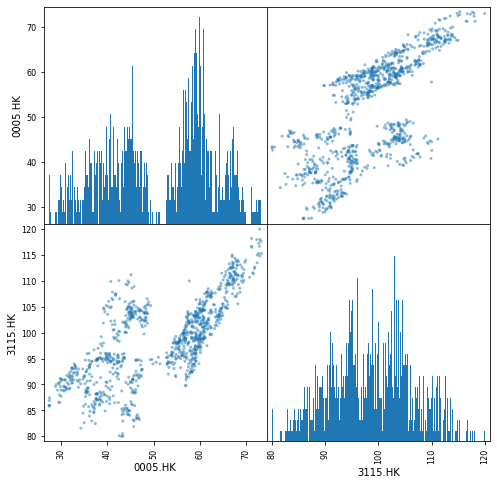

In [22]:
data = pd.concat([s1['Open'],s2['Open']],axis = 1)
data.columns = [stockcode1,stockcode2]
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250});

### Return Analysis

In [23]:
# compute returns
s1['returns'] = np.log(s1['Close']/s1['Close'].shift(1))
s2['returns'] = np.log(s2['Close']/s2['Close'].shift(1))

In [24]:
s1.dropna(subset = ["returns"], inplace=True)
s2.dropna(subset = ["returns"], inplace=True)

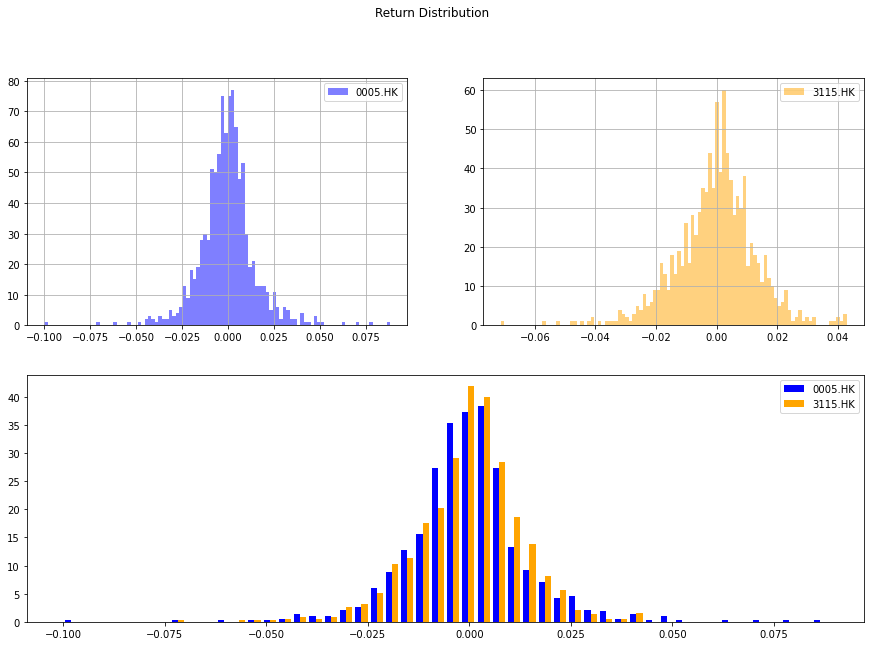

In [25]:
plt.subplot(2, 2, 1)
s1['returns'].hist(bins = 100, label = stockcode1, alpha = 0.5, figsize = (15,10), color = 'blue')
plt.legend();

plt.subplot(2, 2, 2)
s2['returns'].hist(bins = 100, label = stockcode2, alpha = 0.5, color = 'orange')
plt.legend();

plt.subplot(2, 1, 2)
colors = ['blue', 'orange']
label = [stockcode1, stockcode2]
plt.hist((s1['returns'], s2['returns']), 50, density = True, histtype ='bar', color = colors, label = label)

plt.legend();

plt.suptitle("Return Distribution");

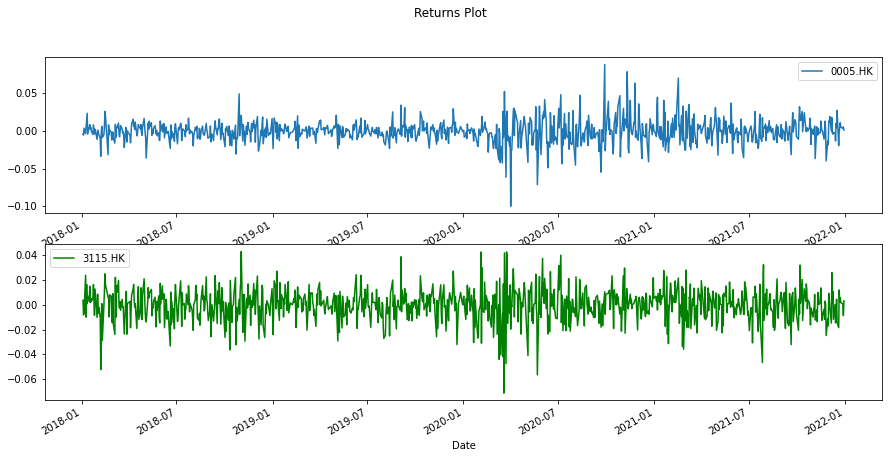

In [26]:

plt.subplot(2, 1, 1)
s1['returns'].plot(label = stockcode1, figsize = (15,7))
plt.legend()

plt.subplot(2, 1, 2)
s2['returns'].plot(label = stockcode2, color = 'green')
plt.legend()

plt.suptitle("Returns Plot");

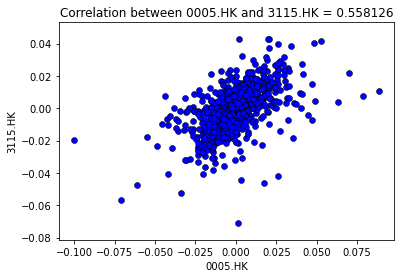

In [27]:
from numpy import cov
covariance = cov(s1['returns'], s2['returns'])
correlation = covariance[0, 1] / (np.sqrt(covariance[0, 0] * covariance[1, 1]) )

# Plotting the generated samples
plt.plot(s1['returns'],s2['returns'], 'o', c='blue',
         markeredgewidth = 0.5,
         markeredgecolor = 'black')
plt.title('Correlation between %s and %s = %f' % (stockcode1, stockcode2, correlation))
plt.xlabel(stockcode1)
plt.ylabel(stockcode2)
plt.axis('equal')

plt.show() 


In [28]:
#use seaborn to show the distribution

# import seaborn as sns
# from scipy import stats

# sns.distplot(s1['returns'], hist=True)

# plt.show();

## QQ plots

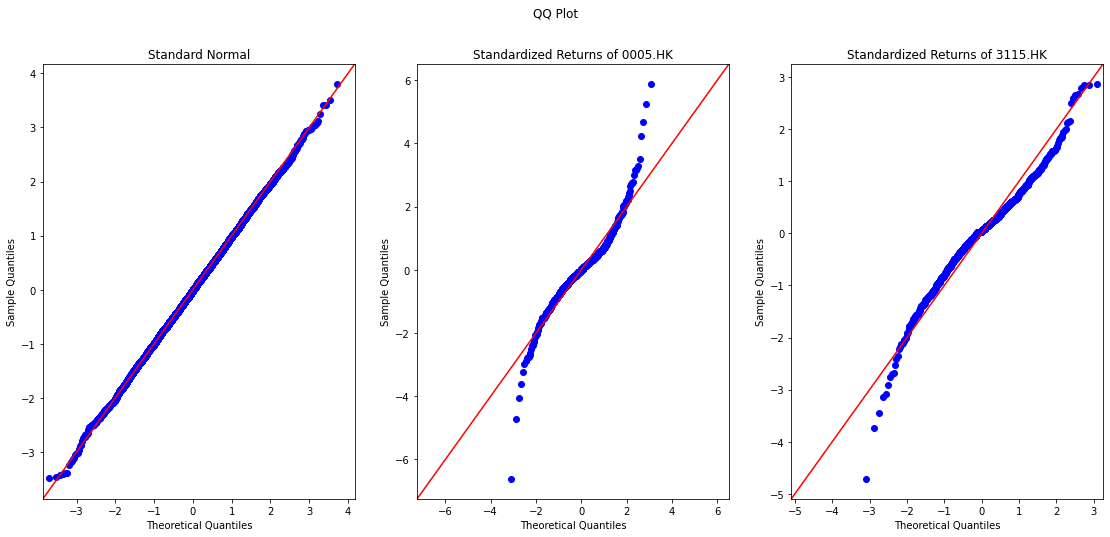

In [29]:
# for qq plot
import statsmodels.api as sm
import pylab as py

# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.

s1['Normalized_Returns'] = (s1['returns'] - s1['returns'].mean())/ s1['returns'].std()
s2['Normalized_Returns'] = (s2['returns'] - s2['returns'].mean())/ s1['returns'].std()
    
# Random data points generated
data_points = np.random.normal(0, 1, 10000)    

fig1, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(19,8))


ax0.title.set_text('Standard Normal')
ax1.title.set_text('Standardized Returns of %s' % (stockcode1))
ax2.title.set_text('Standardized Returns of %s' % (stockcode2))


sm.qqplot(data_points, line ='45', ax=ax0)
sm.qqplot(s1['Normalized_Returns'], line ='45', ax=ax1)
sm.qqplot(s2['Normalized_Returns'], line ='45', ax=ax2)

plt.suptitle("QQ Plot");

py.show()

In [30]:
from scipy import stats

#perform Kolmogorov-Smirnov test
stats.kstest(s1['Normalized_Returns'], 'norm')

KstestResult(statistic=0.08781588319601308, pvalue=4.6550507987018356e-07)

In [31]:
#perform Kolmogorov-Smirnov test
stats.kstest(s2['Normalized_Returns'], 'norm')

KstestResult(statistic=0.07880025539419233, pvalue=9.108282484908462e-06)

In [32]:
# Random data points generated
data_points = np.random.normal(0, 1, 1000000)  

#perform Kolmogorov-Smirnov test
stats.kstest(data_points, 'norm')

KstestResult(statistic=0.0008073137518842533, pvalue=0.5320211747307065)

## Regression Analysis

In [33]:
import statsmodels.api as sm

In [34]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(s1['returns'])

target = pd.DataFrame(s2['returns'])


In [35]:
X = df["returns"]
y = target["returns"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                returns   R-squared (uncentered):                   0.312
Model:                            OLS   Adj. R-squared (uncentered):              0.311
Method:                 Least Squares   F-statistic:                              445.8
Date:                Tue, 25 Jan 2022   Prob (F-statistic):                    6.62e-82
Time:                        21:07:51   Log-Likelihood:                          3060.8
No. Observations:                 985   AIC:                                     -6120.
Df Residuals:                     984   BIC:                                     -6115.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
returns        0.4842      0.023     21.113      0.000       0.439       0.529
==============================================================================
Omnibus:                      168.838   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.042
Skew:                          -0.756   Prob(JB):                    1.07e-149
Kurtosis:                       6.799   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Time series decomposition

In [36]:
y = s1['returns'].resample('MS').mean()

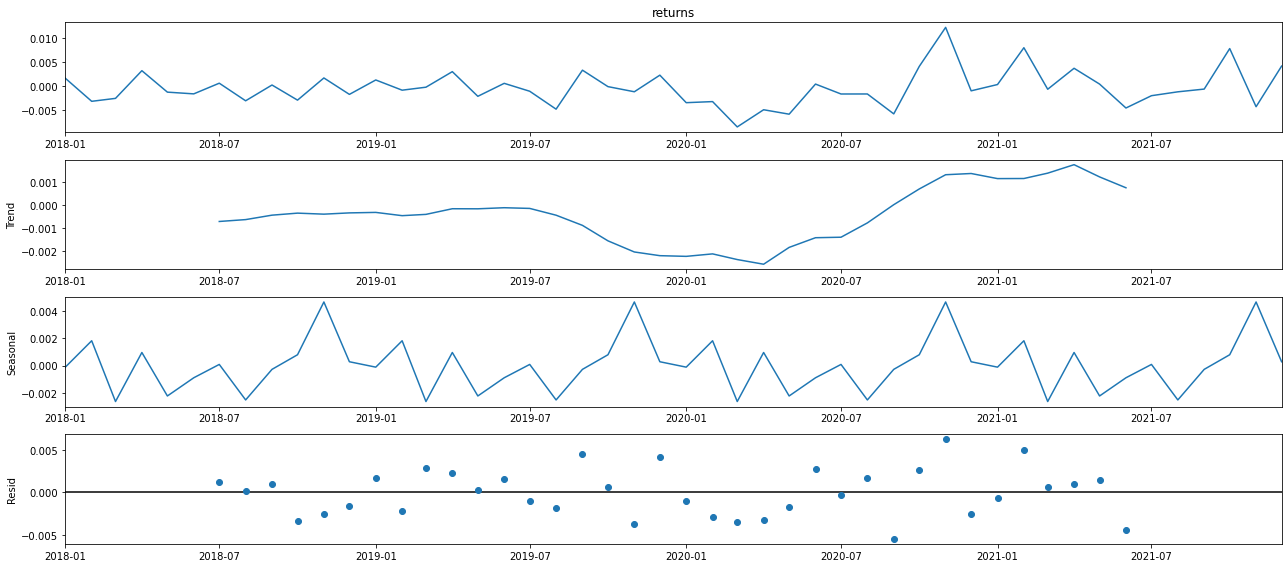

In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## ACF PACF Analysis

https://mlforanalytics.com/2020/04/23/financial-analytics-auto-correlation-in-squared-returns/

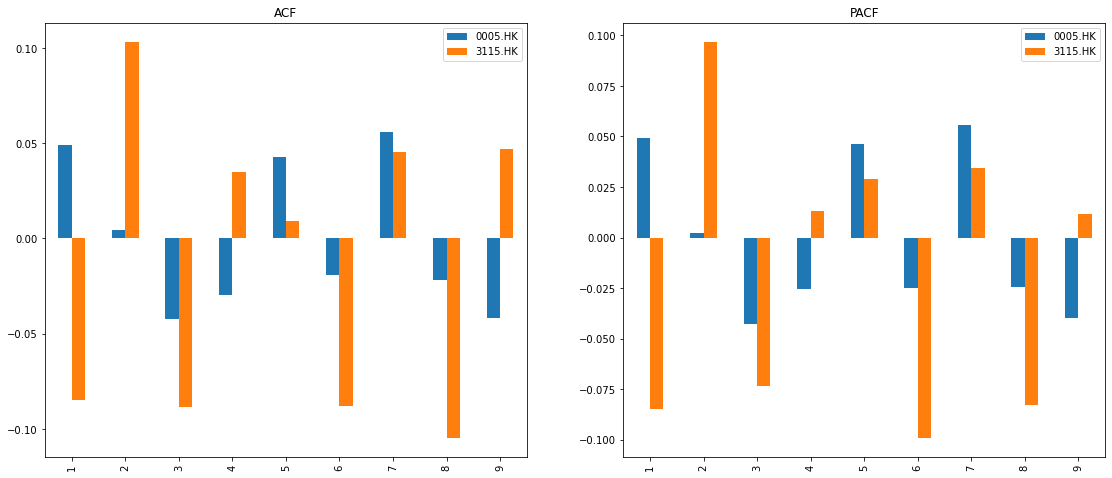

In [38]:
from statsmodels.tsa.stattools import acf, pacf

lags = 10

acf_1 =  acf(s1['returns'])[1:lags]
acf_2 =  acf(s2['returns'])[1:lags]
pacf_1 =  pacf(s1['returns'])[1:lags]
pacf_2 =  pacf(s2['returns'])[1:lags]

fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(19,8))


test_df = pd.DataFrame([acf_1, acf_2]).T
test_df.columns = [stockcode1, stockcode2]
test_df.index += 1
test_df.plot(kind='bar', ax=ax1)

test_df1 = pd.DataFrame([pacf_1, pacf_2]).T
test_df1.columns = [stockcode1, stockcode2]
test_df1.index += 1
test_df1.plot(kind='bar', ax=ax2)

ax1.title.set_text('ACF')
ax2.title.set_text('PACF')


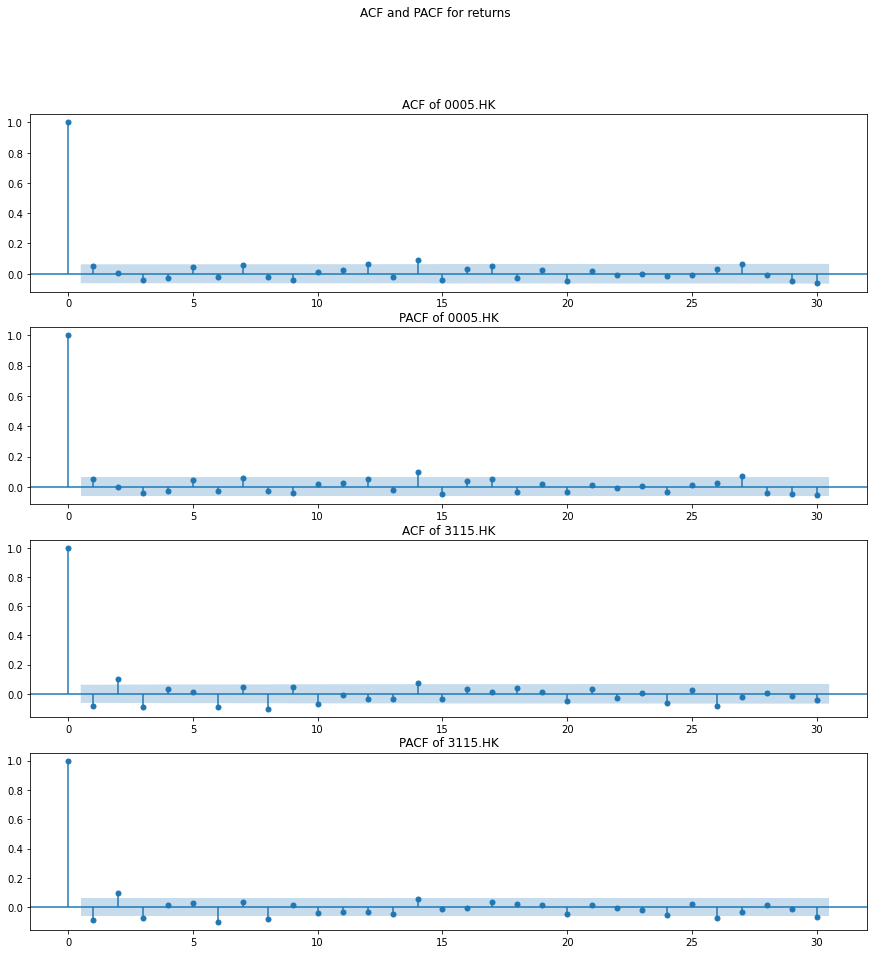

In [39]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(15,15))

lags = 30

plot_acf(s1['returns'], lags=lags, ax=ax1)
plot_pacf(s1['returns'], lags=lags, ax=ax2)
plot_acf(s2['returns'], lags=lags, ax=ax3)
plot_pacf(s2['returns'], lags=lags, ax=ax4)

ax1.title.set_text('ACF of %s' % (stockcode1))
ax2.title.set_text('PACF of %s' % (stockcode1))
ax3.title.set_text('ACF of %s' % (stockcode2))
ax4.title.set_text('PACF of %s' % (stockcode2))

plt.suptitle("ACF and PACF for returns");

pyplot.show()

In [40]:
s1['Squared_Returns'] = s1['returns'] * s1['returns']
s1['Abs_Returns'] = np.absolute(s1['returns'])


s2['Squared_Returns'] = s2['returns'] * s2['returns']
s2['Abs_Returns'] = np.absolute(s2['returns'])

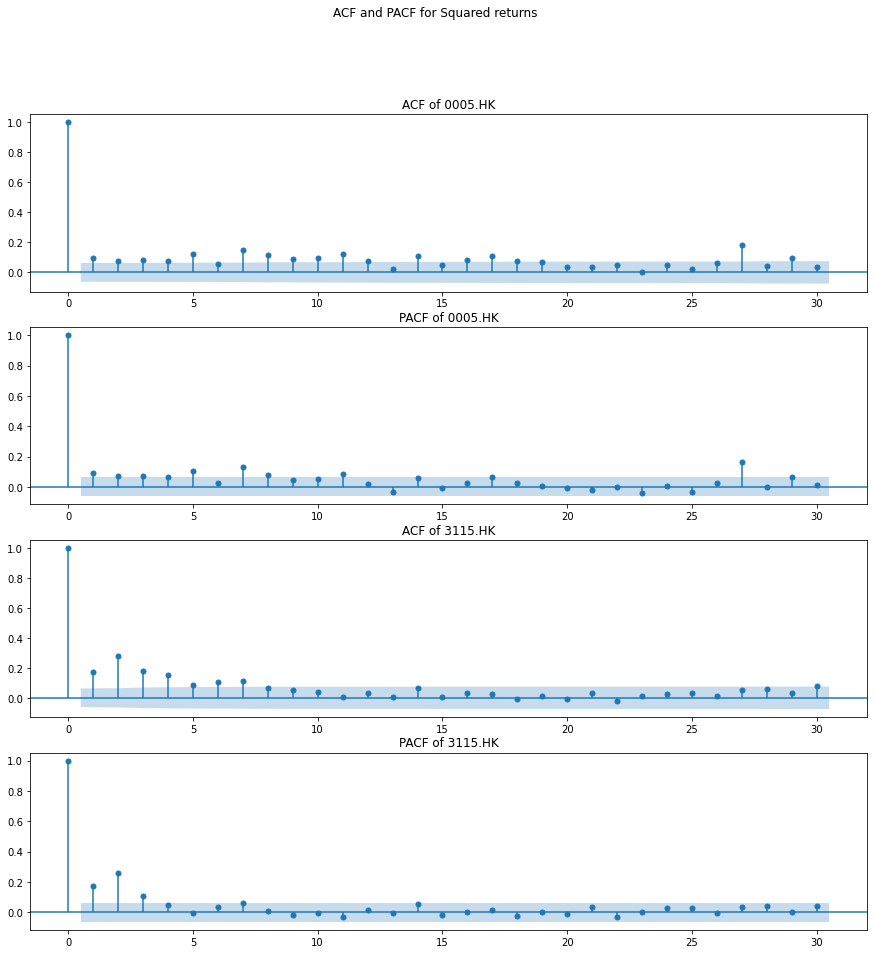

In [41]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(15,15))

lags = 30

plot_acf(s1['Squared_Returns'], lags=lags, ax=ax1)
plot_pacf(s1['Squared_Returns'], lags=lags, ax=ax2)
plot_acf(s2['Squared_Returns'], lags=lags, ax=ax3)
plot_pacf(s2['Squared_Returns'], lags=lags, ax=ax4)

ax1.title.set_text('ACF of %s' % (stockcode1))
ax2.title.set_text('PACF of %s' % (stockcode1))
ax3.title.set_text('ACF of %s' % (stockcode2))
ax4.title.set_text('PACF of %s' % (stockcode2))

plt.suptitle("ACF and PACF for Squared returns");

pyplot.show()

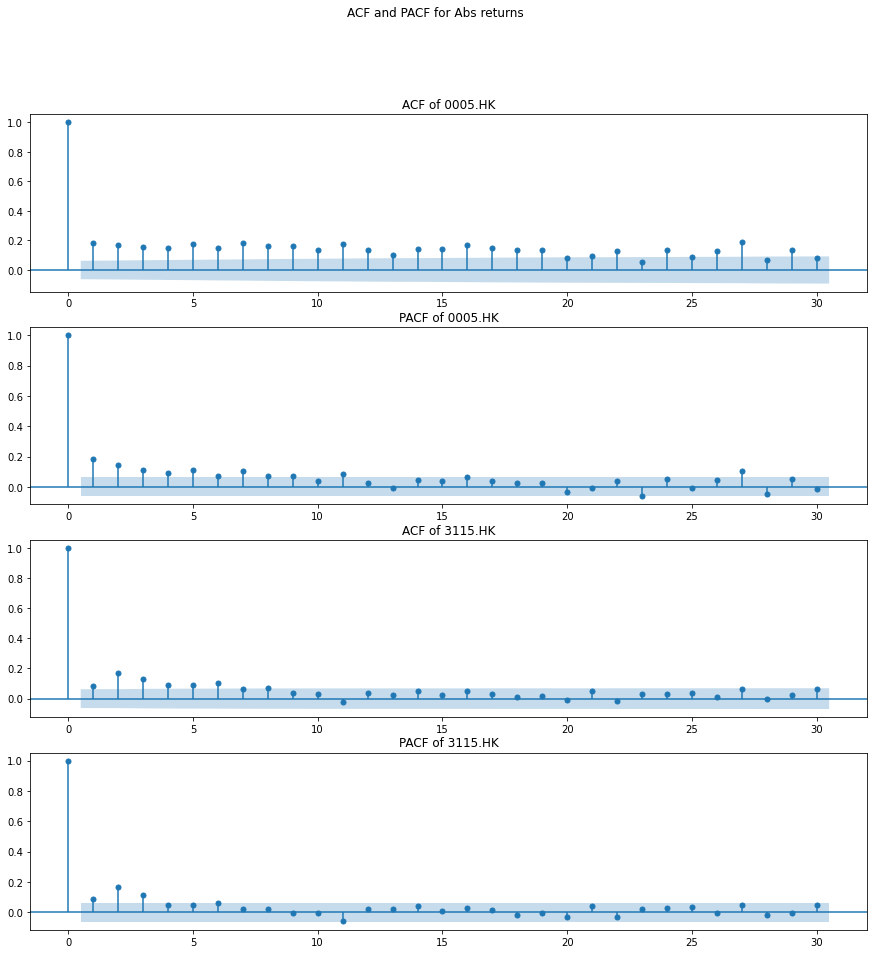

In [42]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(15,15))

lags = 30

plot_acf(s1['Abs_Returns'], lags=lags, ax=ax1)
plot_pacf(s1['Abs_Returns'], lags=lags, ax=ax2)
plot_acf(s2['Abs_Returns'], lags=lags, ax=ax3)
plot_pacf(s2['Abs_Returns'], lags=lags, ax=ax4)

ax1.title.set_text('ACF of %s' % (stockcode1))
ax2.title.set_text('PACF of %s' % (stockcode1))
ax3.title.set_text('ACF of %s' % (stockcode2))
ax4.title.set_text('PACF of %s' % (stockcode2))

plt.suptitle("ACF and PACF for Abs returns");


pyplot.show()

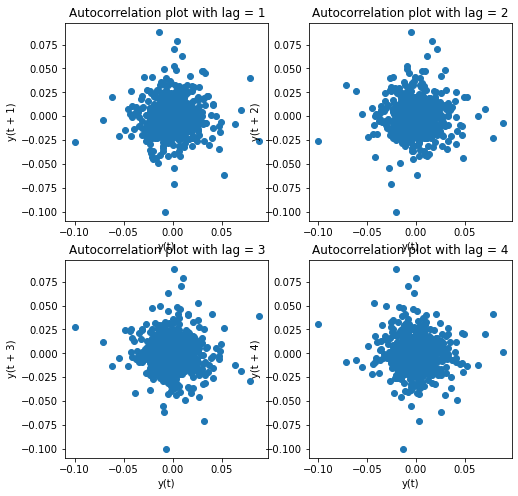

In [43]:
# import numpy as np 
# import pandas as pd 
# import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
#from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


fig1, ((ax11, ax12), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

lag_plot(s1['returns'], lag=1, ax=ax11)
ax11.title.set_text('Autocorrelation plot with lag = 1')

lag_plot(s1['returns'], lag=2, ax=ax12)
ax12.title.set_text('Autocorrelation plot with lag = 2')

lag_plot(s1['returns'], lag=3, ax=ax21)
ax21.title.set_text('Autocorrelation plot with lag = 3')

lag_plot(s1['returns'], lag=4, ax=ax22)
ax22.title.set_text('Autocorrelation plot with lag = 4')

plt.show();

## ARIMA on Return & Price

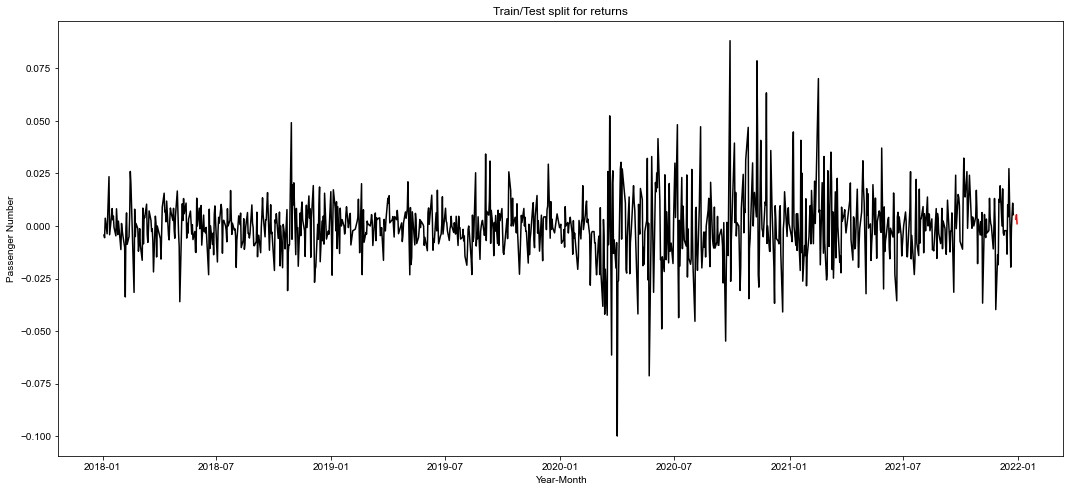

In [44]:
# https://towardsdatascience.com/mastering-time-series-analysis-in-python-8219047a0351
import seaborn as sns

df = pd.DataFrame(s1['returns'])

cutoff = '2021-12-28'

df['Date'] = df.index
train = df[df['Date'] < np.datetime64(cutoff)]
train['train'] = train['returns']
del train['Date'] 
del train['returns']
test = df[df['Date'] >= np.datetime64(cutoff)]
del test['Date']
test['test'] = test['returns']
del test['returns']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for returns")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show();

In [45]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
results = model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction']) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-5445.235, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5449.918, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5450.283, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5450.258, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5451.195, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5448.281, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.003 seconds


In [46]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   5.23e-06     43.368      0.000       0.000       0.000


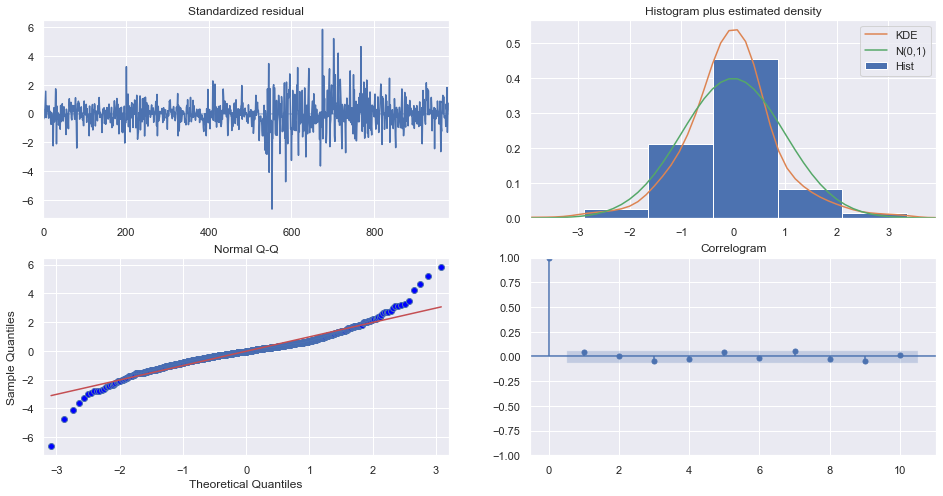

In [47]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

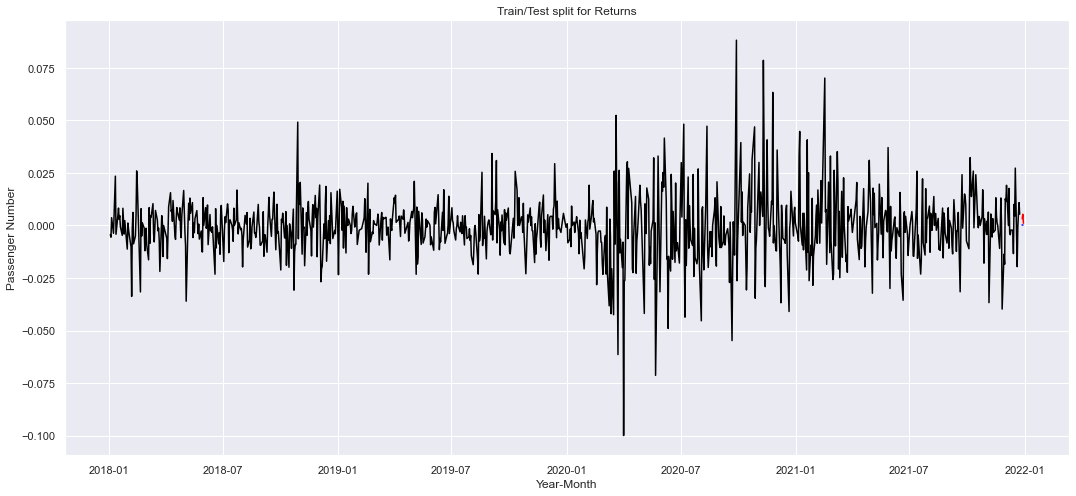

In [48]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "blue")
plt.title("Train/Test split for Returns")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show();

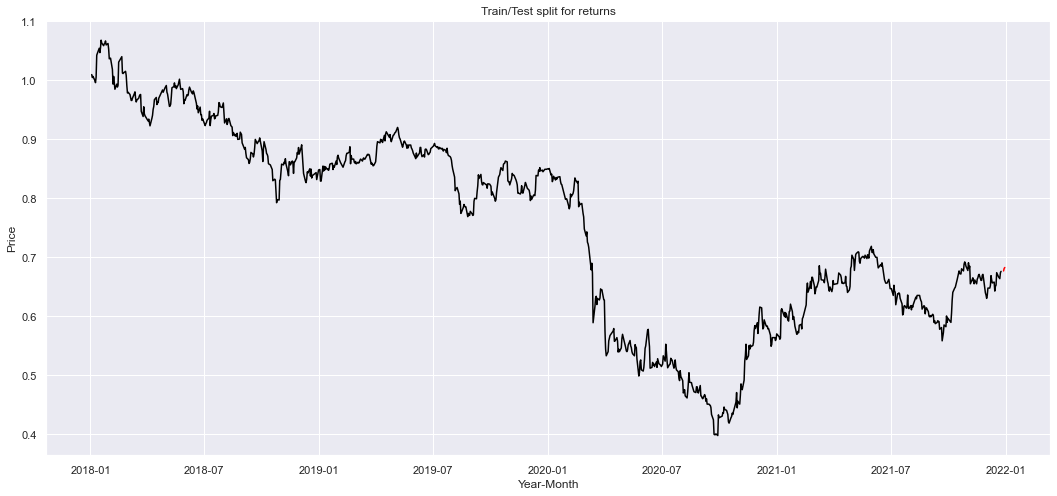

In [49]:
df = pd.DataFrame(s1['Normalized_Open'])

cutoff = '2021-12-28'

df['Date'] = df.index
train = df[df['Date'] < np.datetime64(cutoff)]
train['train'] = train['Normalized_Open']
del train['Date'] 
del train['Normalized_Open']
test = df[df['Date'] >= np.datetime64(cutoff)]
del test['Date']
test['test'] = test['Normalized_Open']
del test['Normalized_Open']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for returns")
plt.ylabel("Price")
plt.xlabel('Year-Month')
sns.set()
plt.show();

In [50]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
results = model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction']) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6134.230, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6140.716, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6139.425, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6139.466, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6141.698, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6137.729, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.397 seconds


In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  982
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3071.849
Date:                Tue, 25 Jan 2022   AIC                          -6141.698
Time:                        21:07:58   BIC                          -6136.810
Sample:                             0   HQIC                         -6139.839
                                - 982                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   2.58e-06     43.239      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):              1309.82
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.56
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

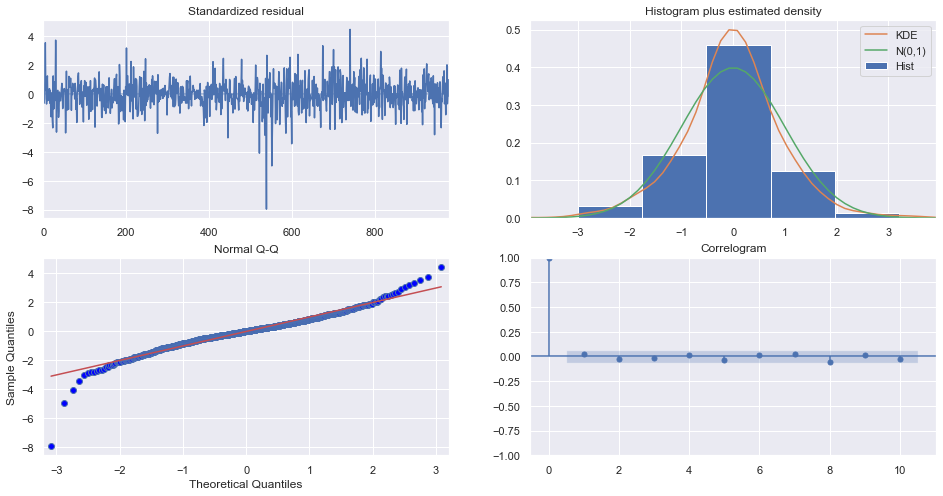

In [52]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

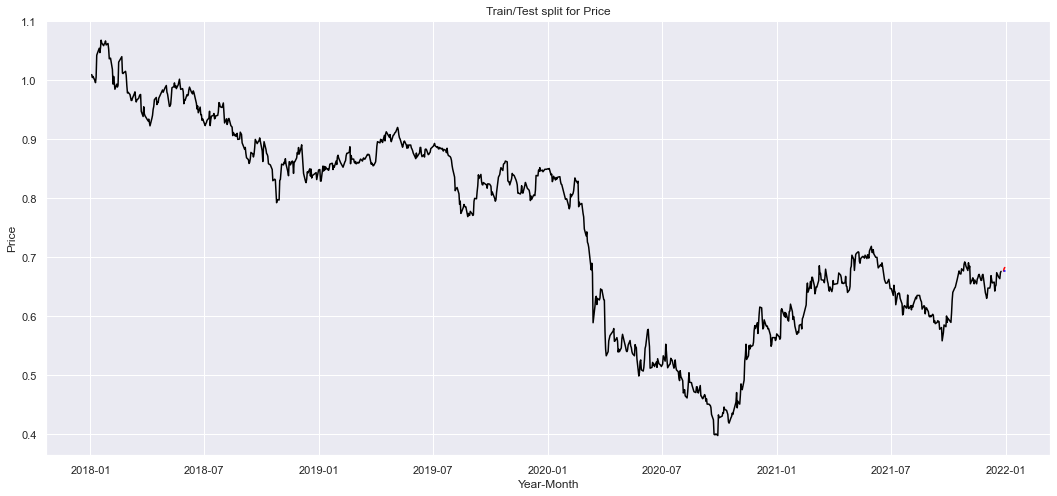

In [53]:

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "blue")
plt.title("Train/Test split for Price")
plt.ylabel("Price")
plt.xlabel('Year-Month')
sns.set()
plt.show();

## ARIMA rolling forecast - Price

In [54]:
import contextlib

rolling_predictions = []
test_size = 30

for i in range(test_size):
    train = s1['Normalized_Open'][:-(test_size-i)]

    # if we use SARIMAX, we use this line    
    #model = sm.tsa.statespace.SARIMAX(train, order = (1, 1, 0), seasonal_order = (0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility = False)
    
    # if we use ARIMA, we use this line
    #model = sm.tsa.arima.ARIMA(train, order = (1, 1, 0), enforce_stationarity=False, enforce_invertibility = False)
    
    # if we use auto ARIMA, we use these two lines
    with contextlib.redirect_stdout(None):
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
    
    results = model.fit(train)
    
    # if we use ARIMA or SARIMAX, we use this line
    #forecast = results.predict()[-1]
    
    # if we use auto ARIMA, we use this line
    forecast = model.predict(n_periods=1)[0]
    
    rolling_predictions.append(forecast)

In [55]:
rolling_predictions = pd.Series(rolling_predictions, index=s1['Normalized_Open'].index[-test_size:])

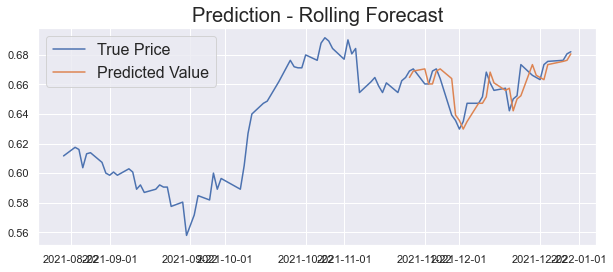

In [56]:
plt.figure(figsize=(10,4))

true, = plt.plot(s1['Normalized_Open'][-test_size*3:])
preds, = plt.plot(rolling_predictions)
plt.title('Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Price', 'Predicted Value'], fontsize=16)

## ARIMA rolling forecast - Return

In [57]:
import contextlib

rolling_predictions = []
test_size = 30

for i in range(test_size):
    train = s1['returns'][:-(test_size-i)]

    # if we use SARIMAX, we use this line    
    #model = sm.tsa.statespace.SARIMAX(train, order = (1, 1, 0), seasonal_order = (0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility = False)
    
    # if we use ARIMA, we use this line
    #model = sm.tsa.arima.ARIMA(train, order = (1, 1, 0), enforce_stationarity=False, enforce_invertibility = False)
    
    # if we use auto ARIMA, we use these two lines
    with contextlib.redirect_stdout(None):
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
    
    results = model.fit(train)
    
    # if we use ARIMA or SARIMAX, we use this line
    #forecast = results.predict()[-1]
    
    # if we use auto ARIMA, we use this line
    forecast = model.predict(n_periods=1)[0]
    
    rolling_predictions.append(forecast)

In [58]:
rolling_predictions = pd.Series(rolling_predictions, index=s1['returns'].index[-test_size:])

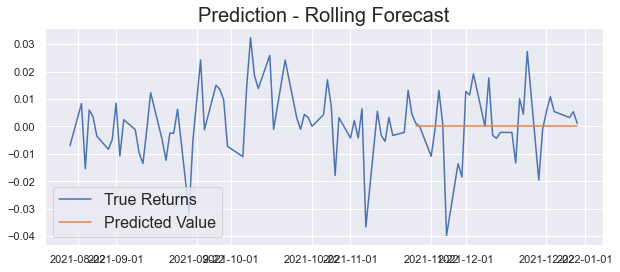

In [59]:
plt.figure(figsize=(10,4))

true, = plt.plot(s1['returns'][-test_size*3:])
preds, = plt.plot(rolling_predictions)
plt.title('Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Value'], fontsize=16)

## GARCH model on return

Text(0.5, 1.0, '0005.HK Returns')

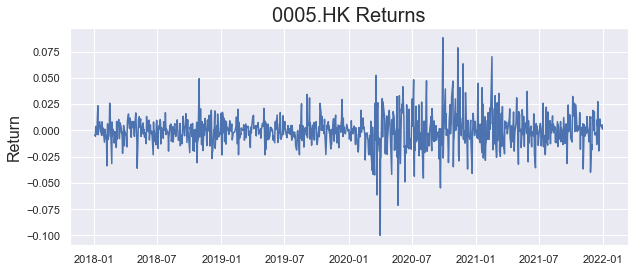

In [60]:
plt.figure(figsize=(10,4))
plt.plot(s1['returns'])
plt.ylabel('Return', fontsize=16)
plt.title('%s Returns' % (stockcode1), fontsize=20)

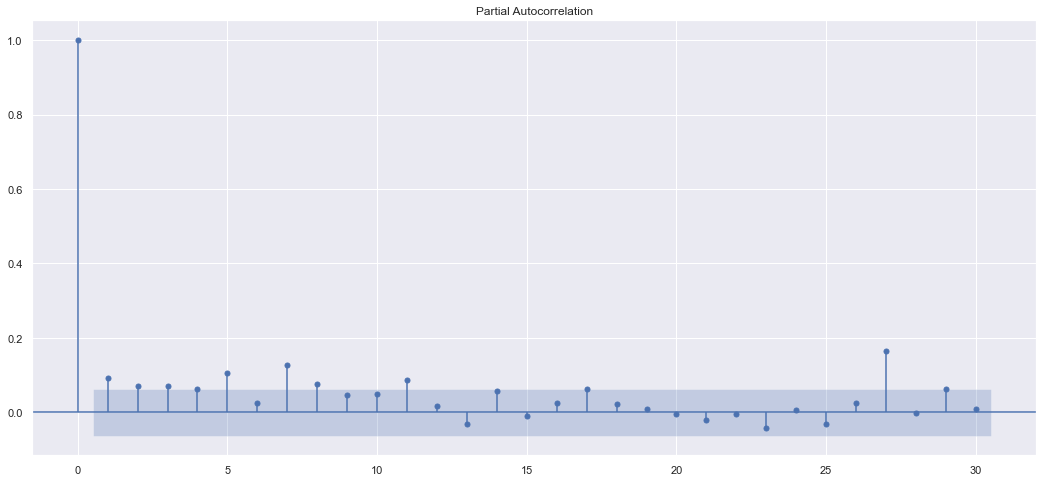

In [61]:
plot_pacf(s1['returns']**2)
plt.show()

In [62]:
from arch import arch_model
model = arch_model(s1['returns'], p=3, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 8317523.625519674
Iteration:      2,   Func. Count:     25,   Neg. LLF: -2858.1177405385065
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2858.11774096272
            Iterations: 6
            Function evaluations: 25
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2858.12
Distribution:                  Normal   AIC:                          -5700.24
Method:            Maximum Likelihood   BIC:                          -5661.09
                                        No. Observations:                  985
Date:                Tue, Jan 25 2022   Df Residuals:                      984
Time:                        21:09:19   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.7162e-04  4.298e-04     -0.865      0.387 [-1.214e-03,4.707e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.5220e-06  7.895e-12  5.728e+05      0.000 [4.522e-06,4.522e-06]
alpha[1]       0.0333  7.838e-02      0.425      0.671     [ -0.120,  0.187]
alpha[2]       0.0333      0.355  9.400e-02      0.925     [ -0.662,  0.728]
alpha[3]       0.0333  5.681e-02      0.587      0.557  [-7.802e-02,  0.145]
beta[1]        0.2933      4.240  6.917e-02      0.945     [ -8.018,  8.605]
beta[2]        0.2933      2.038      0.144      0.886     [ -3.701,  4.288]
beta[3]        0.2933      2.011      0.146      0.884     [ -3.649,  4.235]
============================================================================

Covariance estimator: robust
"""

In [63]:
model = arch_model(s1['returns'], p=3, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 168881222.7605995
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1686.9284653563464
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1890698833.4522185
Iteration:      4,   Func. Count:     43,   Neg. LLF: 3748221.4199959952
Iteration:      5,   Func. Count:     56,   Neg. LLF: 1250105735.2026408
Iteration:      6,   Func. Count:     71,   Neg. LLF: 682250290.0205916
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2738.8829712281213
            Iterations: 9
            Function evaluations: 81
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                2738.88
Distribution:                  Normal   AIC:                          -5467.77
Method:            Maximum Likelihood   BIC:                          -5443.30
                                        No. Observations:                  985
Date:                Tue, Jan 25 2022   Df Residuals:                      984
Time:                        21:09:20   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.7955e-04  4.836e-04     -0.785      0.433 [-1.327e-03,5.683e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.1396e-04  1.297e-05      8.789  1.512e-18 [8.855e-05,1.394e-04]
alpha[1]       0.0667  2.582e-02      2.582  9.827e-03   [1.606e-02,  0.117]
alpha[2]       0.0671  3.539e-02      1.895  5.811e-02  [-2.304e-03,  0.136]
alpha[3]       0.0667  3.183e-02      2.094  3.625e-02   [4.269e-03,  0.129]
============================================================================

Covariance estimator: robust
"""

In [64]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = s1['returns'][:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [65]:
rolling_predictions = pd.Series(rolling_predictions, index=s1['returns'].index[-365:])

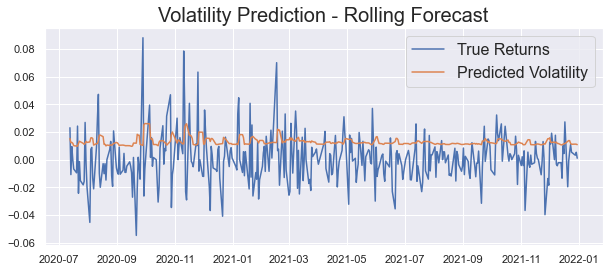

In [66]:
plt.figure(figsize=(10,4))
true, = plt.plot(s1['returns'][-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)